In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import VGG16_BN_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16_bn(weights=VGG16_BN_Weights.IMAGENET1K_V1).to(device)

#  Reprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.215, ECE: 0.020
Optimal temperature: 1.021
After temperature - NLL: 1.213, ECE: 0.018


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9632 ± 0.0011
Final Average Prediction Set Size: 24.73 ± 0.60
Final Average Coverage: 0.9489 ± 0.0014
Final Average Real Probability: 0.8911 ± 0.0024


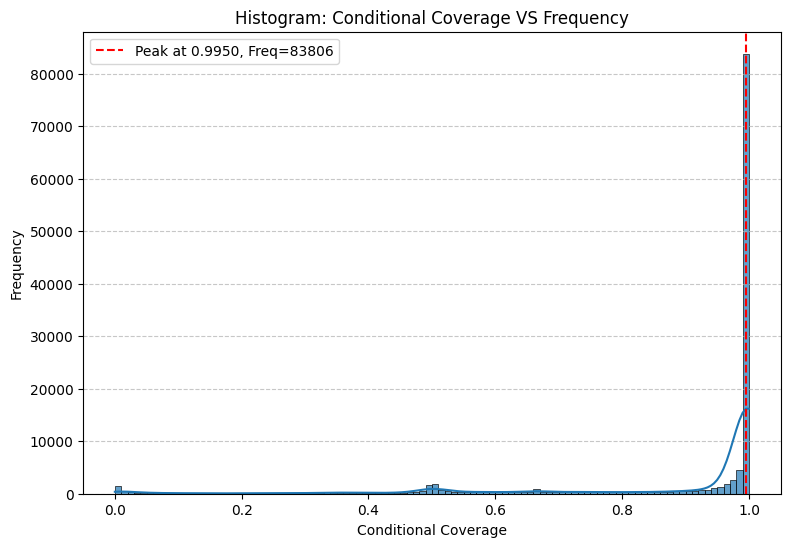

83806 (67.39%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1599 ± 0.0116
Final Average Prediction Set Size: 8.73 ± 0.29
Final Average Coverage: 0.9500 ± 0.0016
Final Average Real Probability: 0.8740 ± 0.0035


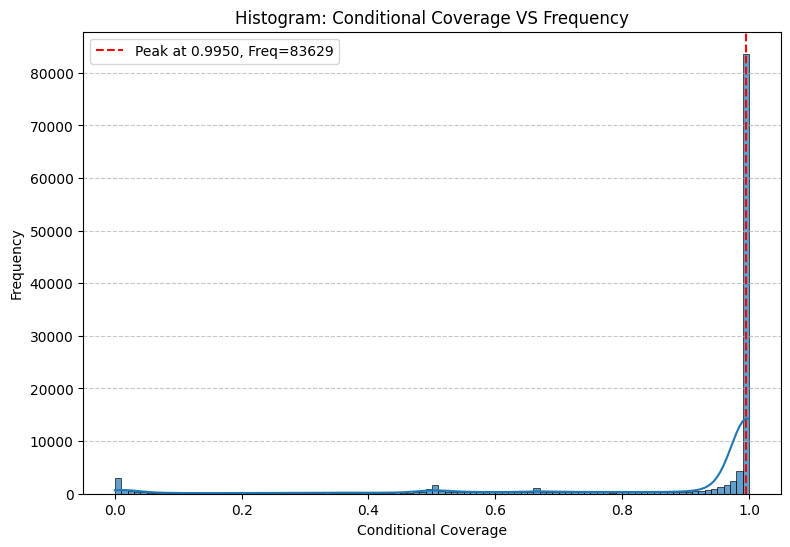

83629 (67.25%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=5, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0286 ± 0.0074
Final Average Prediction Set Size: 6.79 ± 0.15
Final Average Coverage: 0.9497 ± 0.0018
Final Average Real Probability: 0.8739 ± 0.0040


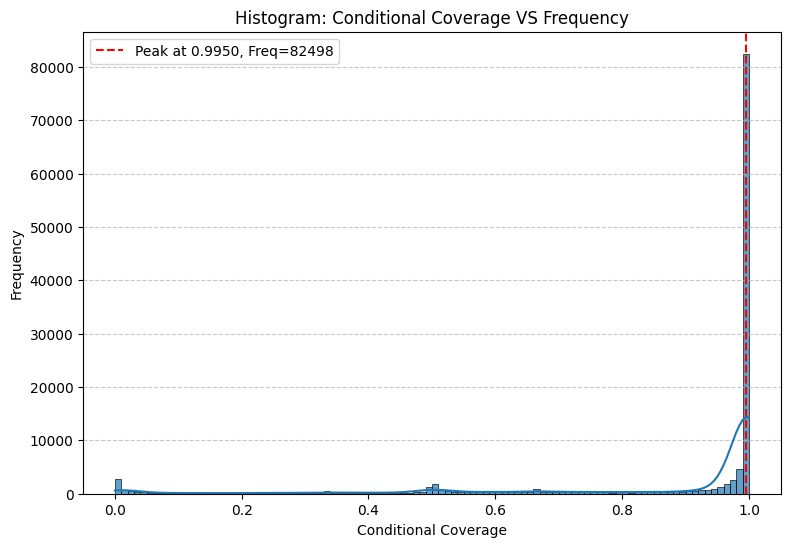

82498 (66.34%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9632 ± 0.0011
Final Average Prediction Set Size: 24.73 ± 0.60
Final Average Coverage: 0.9489 ± 0.0014
Final Average Real Probability: 0.8911 ± 0.0024


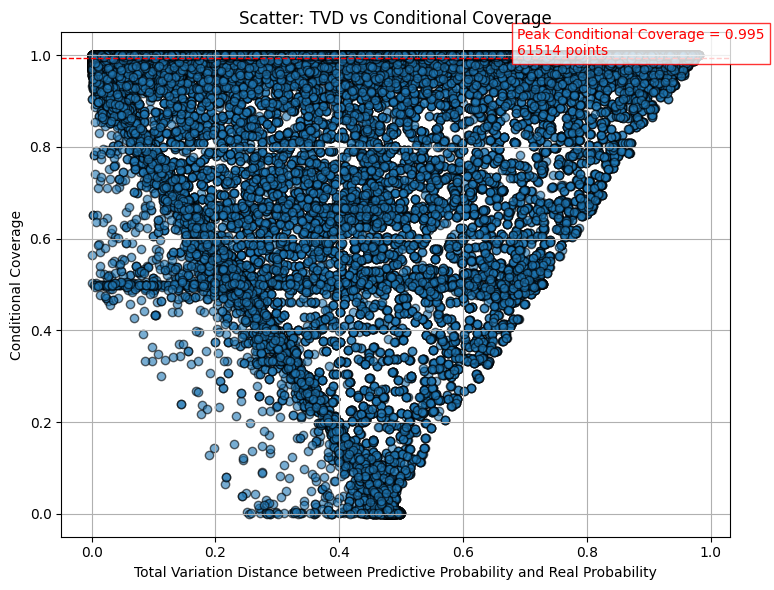

Peak Conditional Coverage = 0.995, with 61514 samples

=== Count Regions Summary ===
42277 (34.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
38432 (30.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
18498 (14.9%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99915']
  Real Probability Set      : ['0.99875']
Sample 2:
  Predictive Probability Set: ['0.87592']
  Real Probability Set      : ['0.99894']
Sample 3:
  Predictive Probability Set: ['0.93891', '0.01379']
  Real Probability Set      : ['0.99832', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.55600', '0.27028', '0.07960', '0.02224', '0.00846', '0.00695', '0.00550', '0.00538', '0.00382', '0.00352']
  Real Probability Set      : ['0.02760', '0.02760', '0.02760', '0.00000', '0.00000', '0.02760', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1599 ± 0.0116
Final Average Prediction Set Size: 8.73 ± 0.29
Final Average Coverage: 0.9500 ± 0.0016
Final Average Real Probability: 0.8740 ± 0.0035


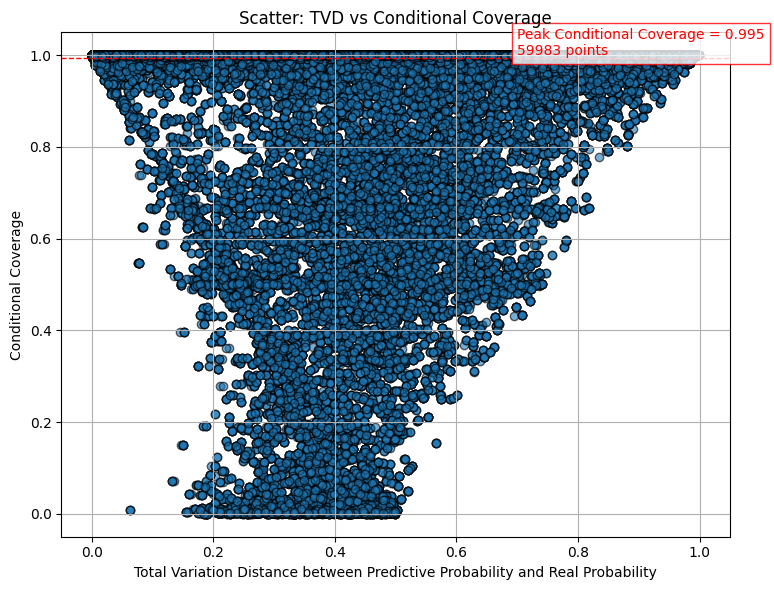

Peak Conditional Coverage = 0.995, with 59983 samples

=== Count Regions Summary ===
42100 (33.9%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
36313 (29.2%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
18627 (15.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.87654', '0.12342', '0.00004', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
  Real Probability Set      : ['0.97268', '0.02732', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.53567', '0.46424', '0.00002', '0.00001', '0.00001', '0.00001', '0.00001', '0.00000']
  Real Probability Set      : ['0.49922', '0.50078', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.94481', '0.02218', '0.01515', '0.01101', '0.00120', '0.00074', '0.00062', '0.00062']
  Real Probability Set

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=5, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0286 ± 0.0074
Final Average Prediction Set Size: 6.79 ± 0.15
Final Average Coverage: 0.9497 ± 0.0018
Final Average Real Probability: 0.8739 ± 0.0040


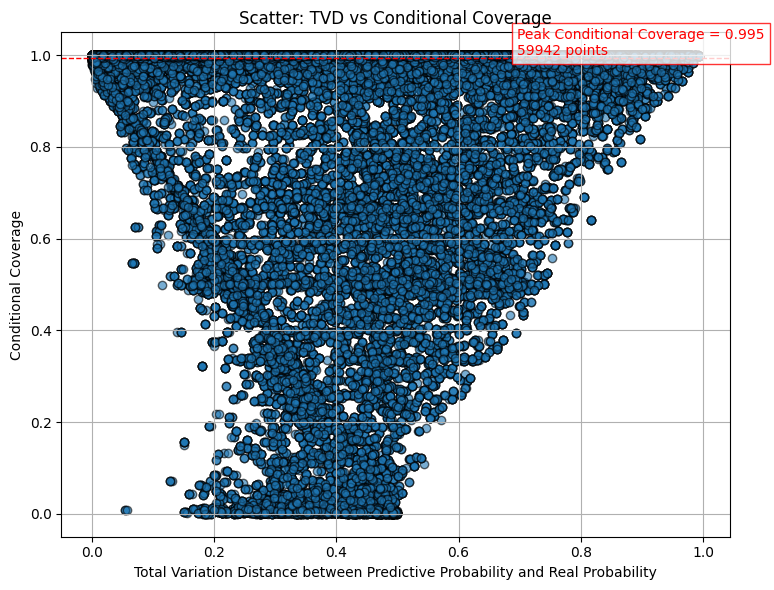

Peak Conditional Coverage = 0.995, with 59942 samples

=== Count Regions Summary ===
42499 (34.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
36510 (29.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
18659 (15.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.55590', '0.44040', '0.00187', '0.00042', '0.00037', '0.00024', '0.00021', '0.00009', '0.00004', '0.00004', '0.00003']
  Real Probability Set      : ['0.50001', '0.49999', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.99054', '0.00438']
  Real Probability Set      : ['0.95961', '0.03872']
Sample 3:
  Predictive Probability Set: ['0.97924', '0.00620']
  Real Probability Set      : ['0.99972', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.45551', '0.1468

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05)